# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. Below are descriptions of each column present in the dataset:

 1. id - movies primary keys
 2. imdb_id - movies unique IMDb identification
 3. popularity - how much that movie page has been visited in the current week on IMDb
 4. Budget - expected amount (money) the movies should generate
 5. Revenue - actual amount (money) the movies generated
 6. original title - Contains the titles of the movies
 7. cast - actors that featured in the movies
 8. homepage - website of the movies
 9. director - name(s) of the movie director
 10. tagline - movies catchphrase/slogans
 11. keywords - keywords that can be used to search for the movie	
 12. overview - synopsis of the movies
 13. runtime - duration (minutes) of the movies
 14. genres	- genres and subgenres of the movies
 15. production_companies - company(ies) that produced the movies
 16. release_date - date (mm/dd/yyyy) when movie was released
 17. vote_count - count of votes for the movies on IMDb
 18. vote_average - average rating of the movies on IMDb
 19. release_year - year the movies was released
 20. budget_adj	- expected amount (money) the movies should generate adjusted to account for inflation over time
 21. revenue_adj - actual amount (money) the movies generated adjusted to account for inflation over time 


### Question(s) for Analysis
1. What year was the highest revenue generated?
2. Which genre of movie have been dominant over the years?
3. Which of the most produced genre generated the highest revenue?
4. What category of movie based on recommendation was the highest?
5. What genre of movie has the lowest average runtime?


In [1]:
# Importing all required packages and activing the magic function for inline plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Gathering and Assessment

In [2]:
# Loading the csv file holding the movie datasets into the movies dataframe
movies_df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Checking to confirm that the datasets were properly loaded
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the table above, it can be seen that there are columns that won't be needed for this analysis. They will be taken care of during the cleaning process but before then, let's get to know the volume of data we are dealing with.

In [4]:
# How big is our data?
movies_df.shape

(10866, 21)

From the above, we have 10866 records(rows) and 21 fields(columns). It will be nice to find out if there are any missing valuse within the data.

In [5]:
# Are there any null values in the dataset?
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the result above, there are 9 columns having varying amount null values. Not to worry about this because some of those columns are the ones we will not be using in this analysis. Are there duplicates in the data?

In [6]:
# Does duplicates exist in the data
sum(movies_df.duplicated())

1

From the above, we can see that we have one duplicate and will take care of that in the **Cleaning** phase of this project. Finally, let's look into the data from a statistical point (summary) of view to gain more insights from the data.

In [7]:
# Statistical Synopsis of numeric columns
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above, it can be seen that the minimum and first quartile of the  budget, revenue, budget_adj, and revenue_adj columns is zero (0). This is weird - even if you don't make a revenue, it is expected that you have a budget for your movie. Hence, I will take this as case of missing data or data input error. 

All the obesrvations made here (Data Assessment) with respect to cleaning will taken care of in the final data wrangling step. Come with me, we can do this!

### Data Cleaning

In [8]:
# Since not all columns are important to answer the proposed question, those columns are been dropped/removed
movies_df.drop(['cast','homepage', 'director', 'tagline', 'keywords','overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [9]:
# Check if those columns above were dropped
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


In [10]:
# How big is our data now?
movies_df.shape

(10866, 11)

If you notice, the number of columns have trimmed down from 21 to 11 but the rows still remain the same meaning that our duplicated column(s), let's take that out right away.

In [11]:
# Remove any existing dupicates
movies_df.drop_duplicates(inplace = True)

In [12]:
# Was the the duplicate removed?
movies_df.shape

(10865, 11)

Now the duplicate row has been removed, let's work on the columns 0 min and 1st quartile we saw in the statistical summary (Data Assessmnet)

In [13]:
# Change all zero to nan in the budget and revenue columns
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)
movies_df['runtime'] = movies_df['runtime'].replace(0, np.nan)

In [14]:
# Was the change effected?
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [15]:
# Create new columns using the genres column in the movies_df data frame by splitting them into main genre (first genre in each record) and subgenres
movies_df[['main_genre', 'subgenre_1', 'subgenre_2', 'subgenre_3', 'subgenre_4']] = movies_df['genres'].str.split('|', expand = True)

In [16]:
# Did the spitting occur?
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,main_genre,subgenre_1,subgenre_2,subgenre_3,subgenre_4
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,Action,Crime,Thriller,None,None


This looks like what we want but it is still messy as the subgenres won't be required for the analysis. Let's work on trimimg the dataframe.

In [17]:
# Drop/remove columns that won't be used for analysis
movies_df.drop(['genres', 'subgenre_1', 'subgenre_2', 'subgenre_3', 'subgenre_4'], axis=1, inplace=True)

In [18]:
# Were the columns drop
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,main_genre
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Action
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,Action
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2480,6.3,2015,Adventure
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,Action
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2947,7.3,2015,Action


For the sake of our analysis, a new column will be added to the dataframe to categorise tem based on recommendation. Here is the metric for categorization based off the vote_average column

0 - 3.5 = Not Recommended

3.6- 7.0 = Recommended

7.0 - 10.0 = Highly Recommended

In [19]:
# Create a column to account for movie recommendation
movies_df['recommendation'] = pd.cut(
    x=movies_df['vote_average'],
    bins=[0, 3.5, 7.0, np.inf],
labels=['Not Recommended', 'Recommended', 'Highly Recommended'],
)

In [20]:
# Was the new column created?
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,main_genre,recommendation
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Action,Recommended
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,Action,Highly Recommended
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2480,6.3,2015,Adventure,Recommended
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,5292,7.5,2015,Action,Highly Recommended
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2947,7.3,2015,Action,Highly Recommended


Now the cleaning phase is done, on to the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What year was the highest revenue generated?

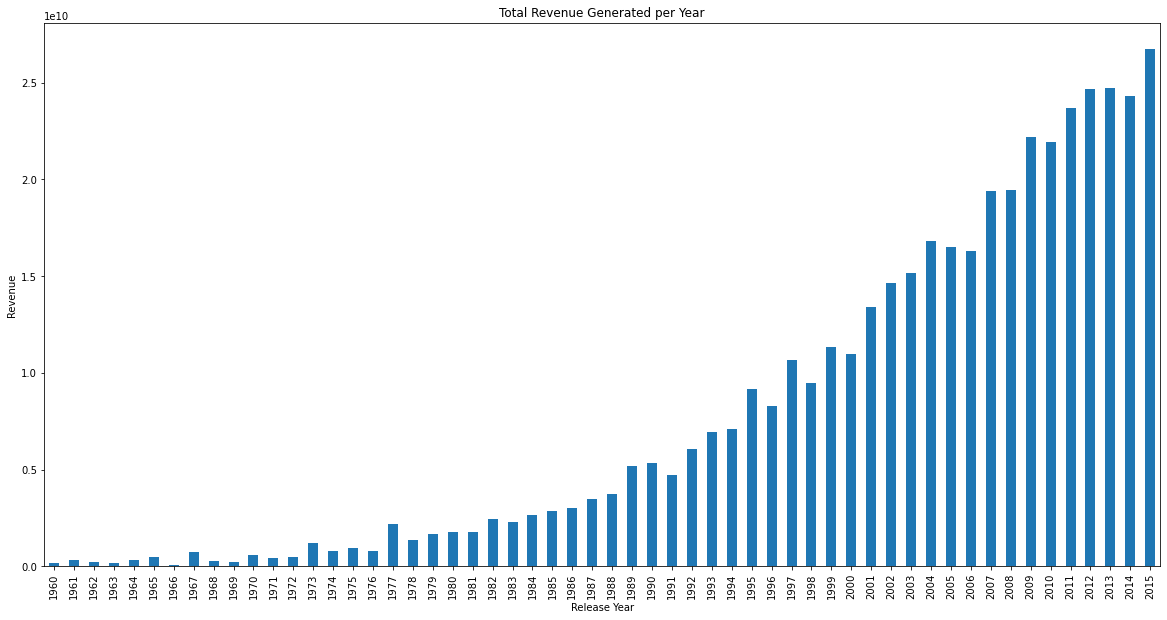

In [36]:
# Plots bar chat to answer the above question
movies_df.groupby('release_year')['revenue'].sum().plot(kind='bar', title = 'Total Revenue Generated per Year', figsize = [20,10]);
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()

From the visual above, it can be seen that over the past 55 years, the year 2015 generated more revenue overall.

### Research Question 2: Which genre of movie has been dominant over the years?

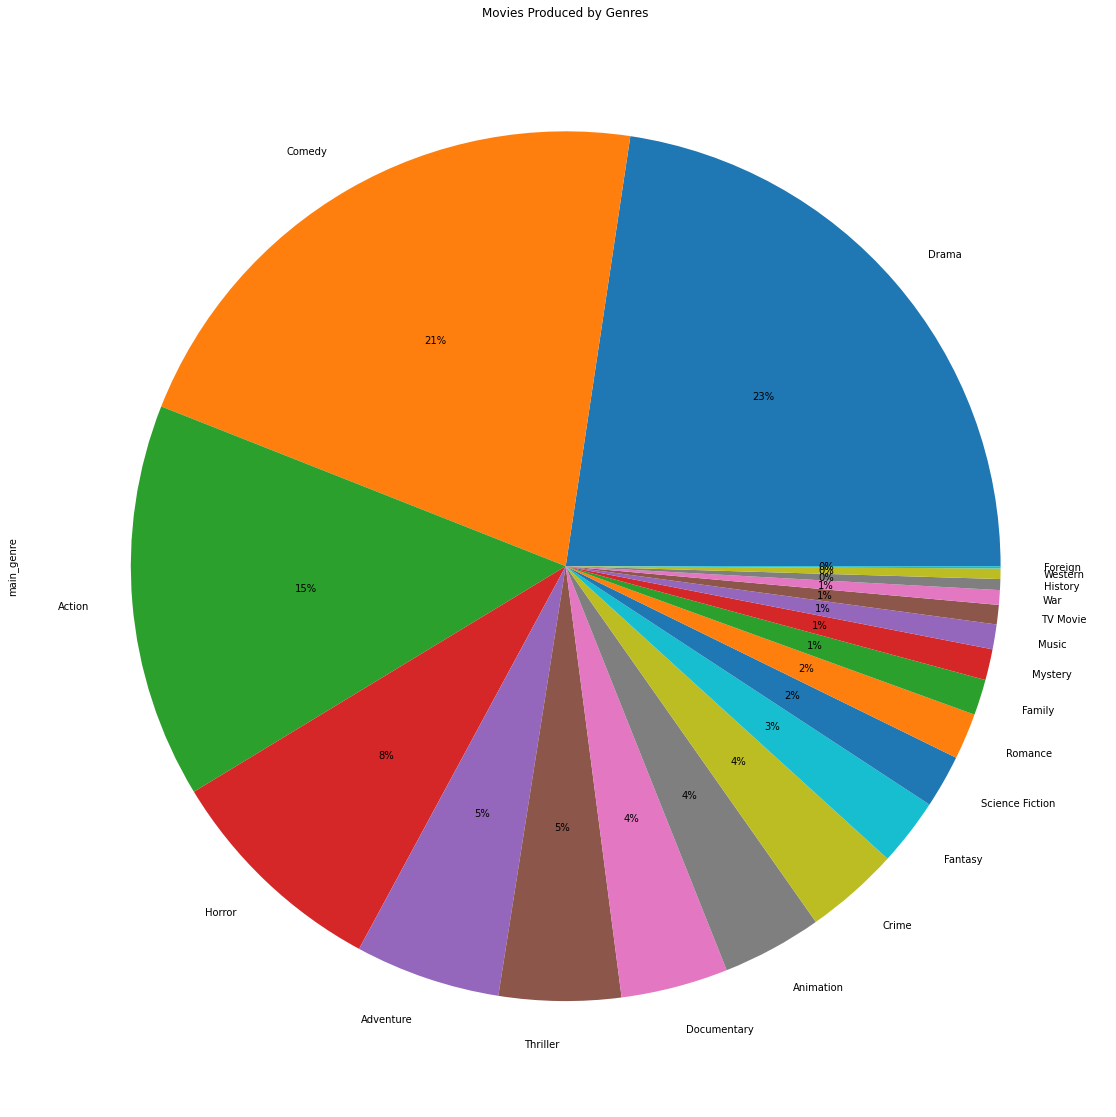

In [22]:
# Plots pie chart to answer the above question
movies_df['main_genre'].value_counts().plot(kind='pie', title = 'Movies Produced by Genres', autopct='%1.0f%%', figsize = [30,20]);

The most produced genre of movies are:

1. Drama

2. Comedy

3. Action

### Research Question 3: Which of the most produced genre generated the highest revenue?

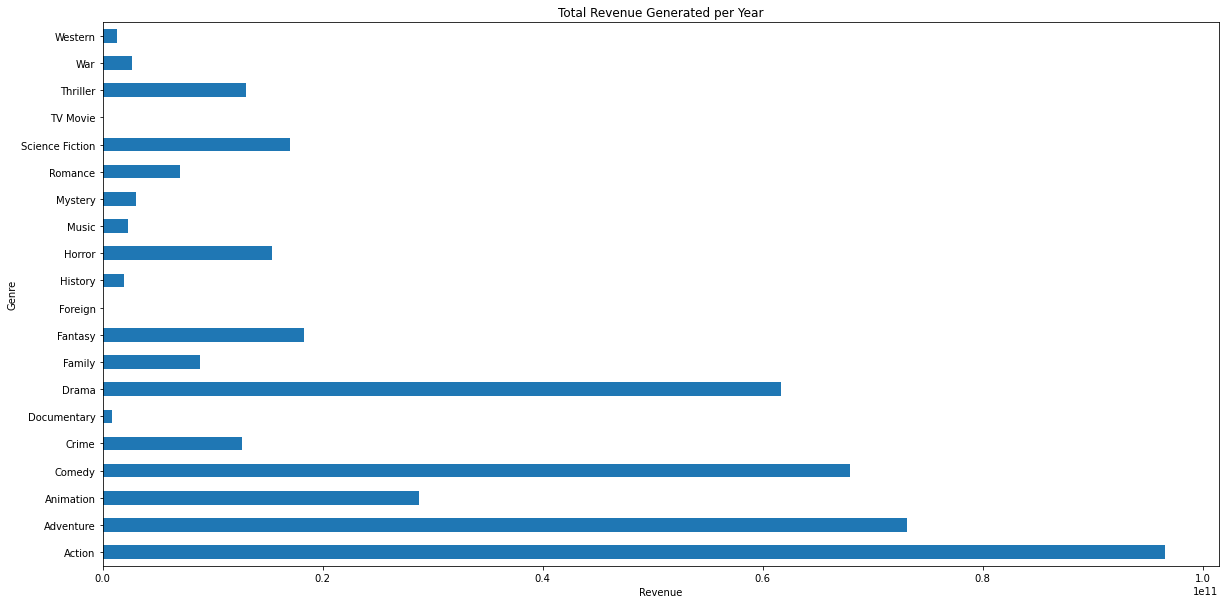

In [34]:
# Plots horizontal bar chart to answer the above question
movies_df.groupby('main_genre')['revenue'].sum().plot(kind='barh', title = 'Total Revenue Generated per Year', figsize = [20,10]);
plt.xlabel('Revenue')
plt.ylabel('Genre')
plt.show()

From the above, the third most produced genre generated the highest revenue while the first and second generated the fourth and third highest revenue respectively.

### Research Question 4: What category of movie based on recommendation was the highest?

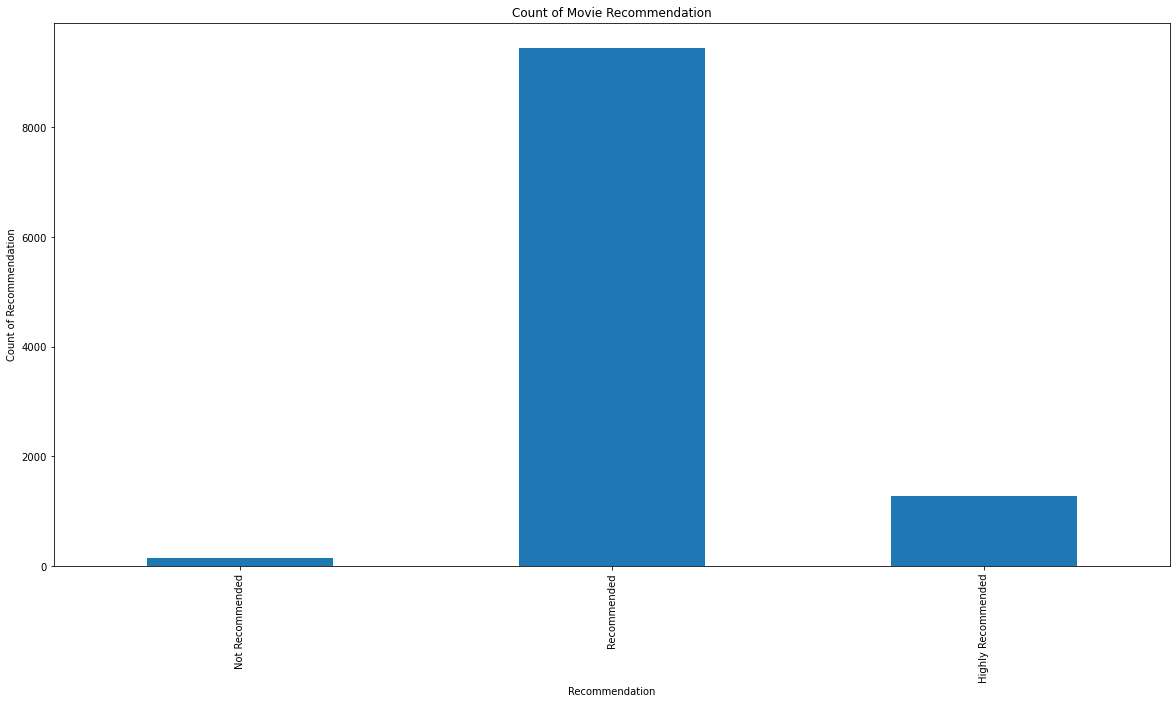

In [33]:
# Plots bar chart to answer the above question
movies_df.groupby('recommendation')['recommendation'].count().plot(kind='bar', title = 'Count of Movie Recommendation', figsize = [20,10]);
plt.xlabel('Recommendation')
plt.ylabel('Count of Recommendation')
plt.show()

From the visual above, the movies under the Recommended category are more when compared to that of Not Recommendes and 'Highly recommended.

### Research Question 5: What genre of movie has the lowest average runtime?

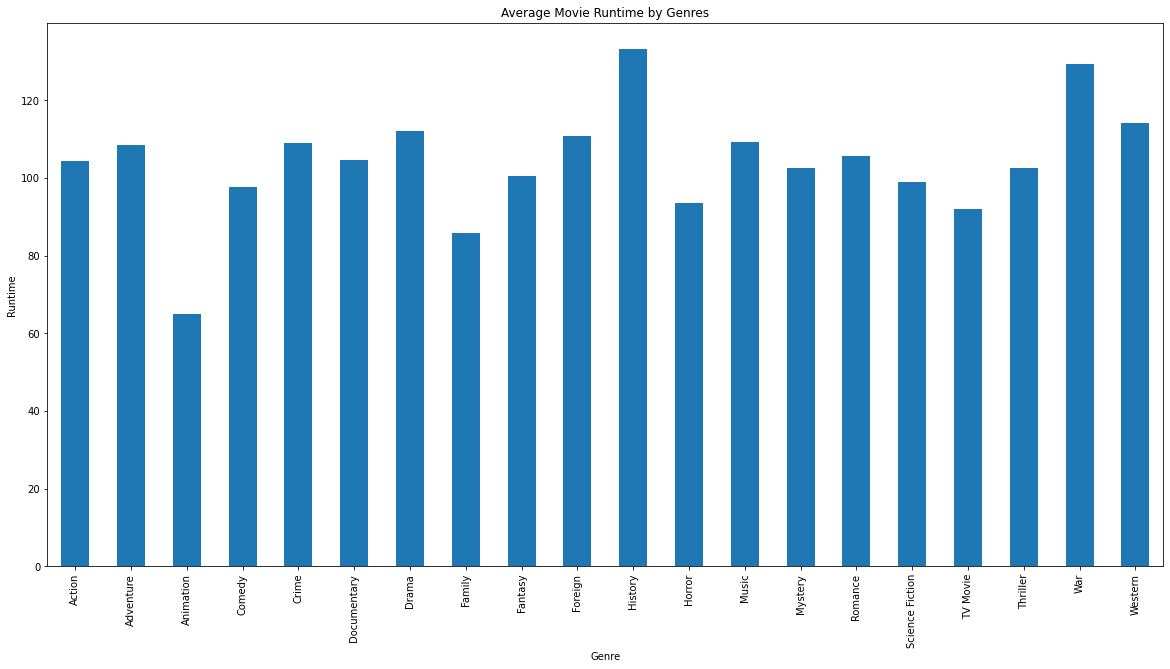

In [37]:
movies_df.groupby('main_genre')['runtime'].mean().plot(kind='bar', title = 'Average Movie Runtime by Genres', figsize = [20,10]);
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.show()

The animation genre has the lowest average runtime with the History genre having the highest runtime

<a id='conclusions'></a>
## Conclusions

The conclusion will be addressed according to the question numbers.

1. Despite the year 2015 generating the highest revenue overall, the revenue generated over the past 55 years has increased on average.

2 and 3. Despite the fact that the action genre came third in the highest number of movies produced, it managed to generate the highest revenue overall. How? I will recommend that a study be done to understand what and how it happened.

4. Over the years, good movies have been produced but it will be nice to move a large percentage from Recommended to Highly Recommended. To do this, I will recommend a study be done to understand what can be done to make most Recommended movies Highly Recommended.

5. The history genre racks up a very high runtime average. I will recommend a study be carried out to determine if this plays a role in the low revenue generated by this genre.

<a id='conclusions'></a>
## Limitation

The following are the limitations I observed during the course of analyzing this dataset:

1. The missing data in the budget and revenue column restricted me from creating an additional column (revenue - budget). This column will have enabled us to analyze the profit trend over the years.

2. The user-defined function will have been used in this analysis but as a result of the limitation in one (1) above, it wasn't. 